In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline 

In [6]:
aapl = pd.read_csv('AAPL_CLOSE', index_col = 'Date', parse_dates=True)
cisco = pd.read_csv('CISCO_CLOSE', index_col = 'Date', parse_dates=True)
ibm = pd.read_csv('IBM_CLOSE', index_col = 'Date', parse_dates=True)
amzn = pd.read_csv('AMZN_CLOSE', index_col = 'Date', parse_dates=True)

In [9]:
stocks = pd.concat([aapl, cisco, ibm, amzn], axis=1)
stocks.columns = ['aapl', 'cisco', 'ibm', 'amzn']

In [10]:
stocks.head()

,aapl,cisco,ibm,amzn
Date,,,,
2012-01-03,53.063218,15.752778,160.830881,179.03
2012-01-04,53.348386,16.057180,160.174781,177.51
2012-01-05,53.940658,15.997991,159.415086,177.61
2012-01-06,54.504543,15.938801,157.584912,182.61
2012-01-09,54.418089,16.040268,156.764786,178.56


In [11]:
stocks.pct_change(1).mean()

aapl     0.000750
cisco    0.000599
ibm      0.000081
amzn     0.001328
dtype: float64

In [13]:
stocks.pct_change(1).corr()

,aapl,cisco,ibm,amzn
aapl,1.000000,0.301990,0.297498,0.235487
cisco,0.301990,1.000000,0.424672,0.284470
ibm,0.297498,0.424672,1.000000,0.258492
amzn,0.235487,0.284470,0.258492,1.000000


In [14]:
stocks.pct_change(1).head()

,aapl,cisco,ibm,amzn
Date,,,,
2012-01-03,NaN,NaN,NaN,NaN
2012-01-04,0.005374,0.019324,-0.004079,-0.008490
2012-01-05,0.011102,-0.003686,-0.004743,0.000563
2012-01-06,0.010454,-0.003700,-0.011481,0.028152
2012-01-09,-0.001586,0.006366,-0.005204,-0.022178


In [16]:
log_ret = np.log(stocks/stocks.shift(1))
log_ret.head()

,aapl,cisco,ibm,amzn
Date,,,,
2012-01-03,NaN,NaN,NaN,NaN
2012-01-04,0.005360,0.019139,-0.004088,-0.008526
2012-01-05,0.011041,-0.003693,-0.004754,0.000563
2012-01-06,0.010400,-0.003707,-0.011547,0.027763
2012-01-09,-0.001587,0.006346,-0.005218,-0.022428


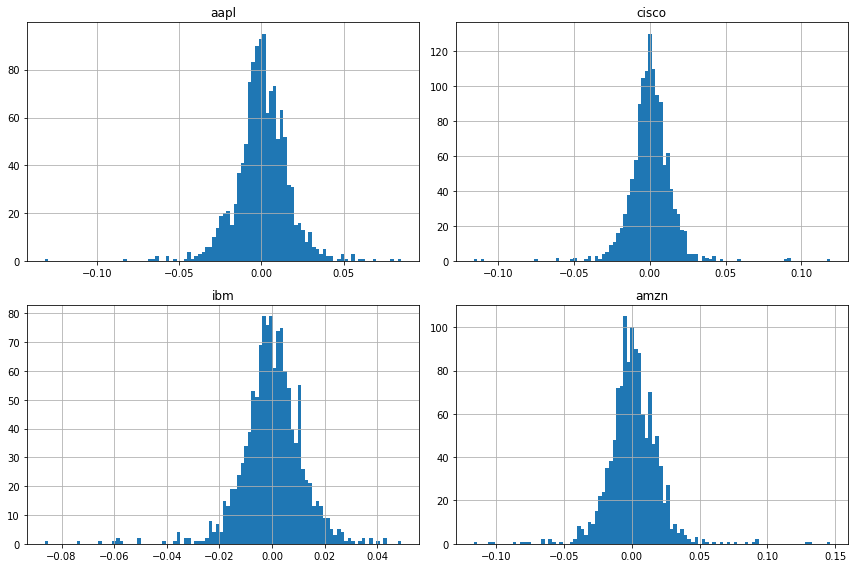

In [17]:
log_ret.hist(bins=100, figsize=(12,8))
plt.tight_layout()

In [18]:
log_ret.mean()

aapl     0.000614
cisco    0.000497
ibm      0.000011
amzn     0.001139
dtype: float64

In [22]:
log_ret.cov() * 252

,aapl,cisco,ibm,amzn
aapl,0.068326,0.017854,0.014464,0.018986
cisco,0.017854,0.051381,0.018029,0.019956
ibm,0.014464,0.018029,0.035203,0.014939
amzn,0.018986,0.019956,0.014939,0.094470


In [29]:
np.random.seed(101)

print(stocks.columns)

weights = np.array(np.random.random((4)))

print("Random Weights")
print(weights)

print("Rebalance")
weights = weights/np.sum(weights)
print(weights)

Index(['aapl', 'cisco', 'ibm', 'amzn'], dtype='object')
Random Weights
[0.51639863 0.57066759 0.02847423 0.17152166]
Rebalance
[0.40122278 0.44338777 0.02212343 0.13326603]


In [32]:
# Expected Returns

print("Expected Portfolio Return")
exp_ret = np.sum((log_ret.mean() * weights) * 252)
print(exp_ret)

Expected Portfolio Return
0.15599272049632007


In [34]:
# Expected Volatility/Variance

print("Expected Volatality")
exp_vol = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov()*252, weights)))
print(exp_vol)

Expected Volatality
0.18502649565909488


In [38]:
# Sharpe Ratio 

print("Share Ratio")
SR = exp_ret/exp_vol
print(SR)

Share Ratio
0.8430831483926033
